# Customer Churn Prevention 

[PLAN](../docs/churn.md)

Churn may depend on multiple parameters

Task: what to propose to user? Possible support

Satisfaction score -> utility

Clusterize users into targeted groups (suseptable to risk?)

*Target_Churn*: Indicates whether the customer churned (True or False).

tasks:
- validate
- compare to ml (svm?)
- 

## EDA section

In [1]:
# imports section
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("../resources/churn.csv") 
print(f'num of rows: {len(df)}')

print(df.iloc[1]) # display second row

header_dict = {col: idx for idx, col in enumerate(df.columns)} 
print(header_dict) # 'index': 0

inverted_header_dict = {value: key for key, value in header_dict.items()}
print(inverted_header_dict) # 0: 'index'

df.head(10)

num of rows: 1000
Customer_ID                           2
Age                                  65
Gender                             Male
Annual_Income                     79.51
Total_Spend                     9025.47
Years_as_Customer                    13
Num_of_Purchases                     77
Average_Transaction_Amount         22.9
Num_of_Returns                        2
Num_of_Support_Contacts               2
Satisfaction_Score                    3
Last_Purchase_Days_Ago              227
Email_Opt_In                      False
Promotion_Response            Responded
Target_Churn                      False
Name: 1, dtype: object
{'Customer_ID': 0, 'Age': 1, 'Gender': 2, 'Annual_Income': 3, 'Total_Spend': 4, 'Years_as_Customer': 5, 'Num_of_Purchases': 6, 'Average_Transaction_Amount': 7, 'Num_of_Returns': 8, 'Num_of_Support_Contacts': 9, 'Satisfaction_Score': 10, 'Last_Purchase_Days_Ago': 11, 'Email_Opt_In': 12, 'Promotion_Response': 13, 'Target_Churn': 14}
{0: 'Customer_ID', 1: 'Age

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
5,6,57,Male,190.43,255.19,19,85,417.78,5,1,4,130,False,Unsubscribed,False
6,7,27,Male,172.13,3512.55,3,77,316.18,0,3,1,61,True,Unsubscribed,False
7,8,37,Other,88.90,7270.90,4,87,63.61,3,4,3,224,False,Ignored,False
8,9,39,Other,24.46,4935.49,1,21,173.80,9,2,4,126,True,Responded,True
9,10,68,Other,169.59,9803.57,17,34,481.18,6,1,2,171,True,Unsubscribed,False


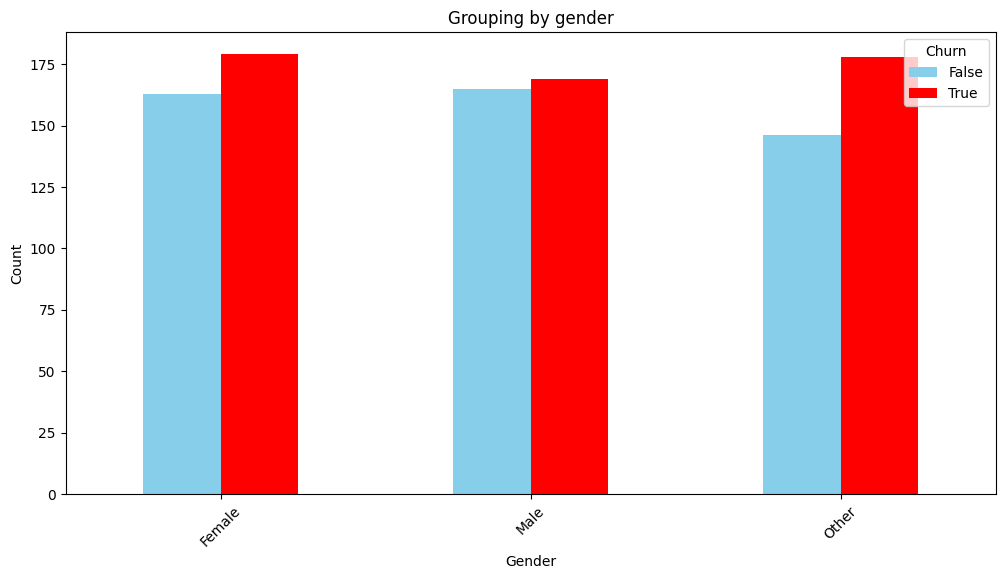

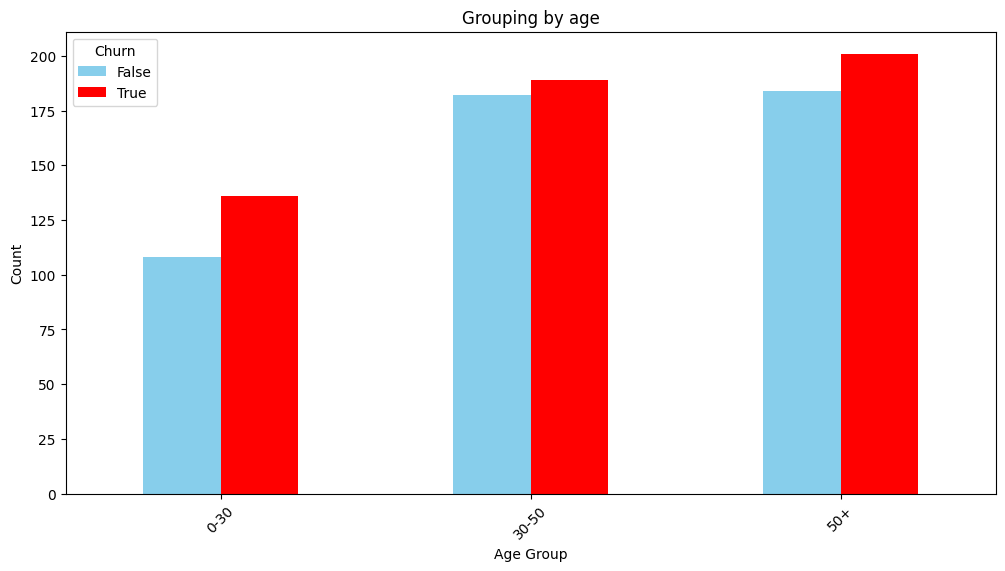

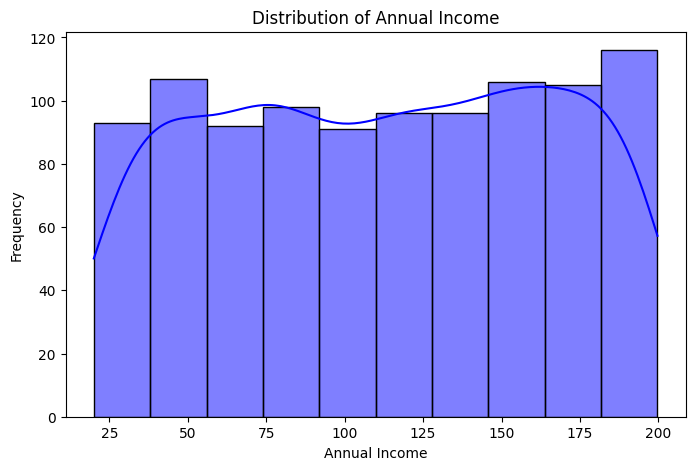

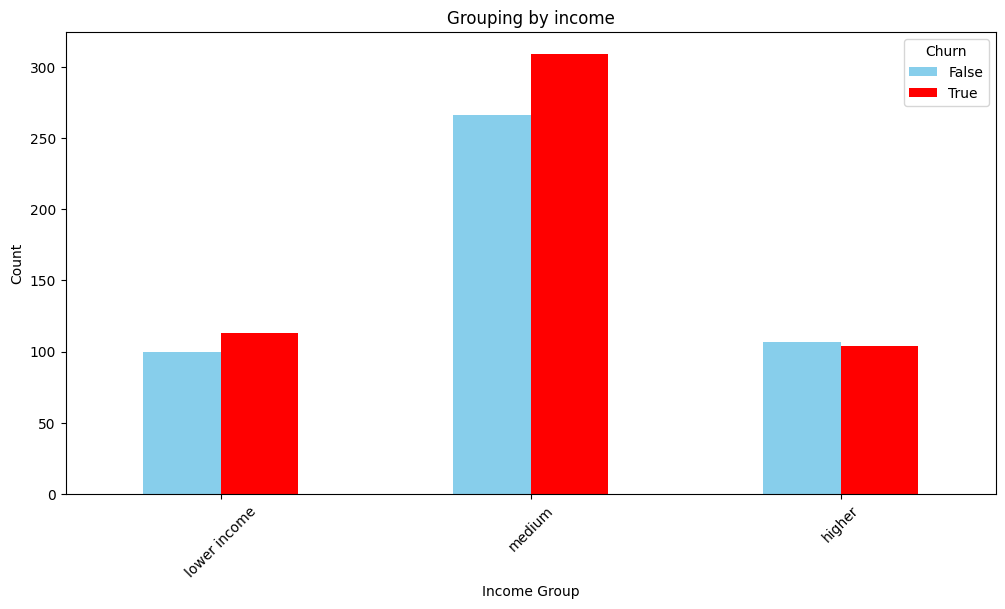

In [3]:
# group by gender
gender_group = df.groupby(["Gender", "Target_Churn"]).size().unstack(fill_value=0)

gender_group.plot(kind="bar", figsize=(12, 6), color=["skyblue", "red"])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Grouping by gender")
plt.legend(title="Churn")
plt.xticks(rotation=45)
plt.show()

# group by age
bins = [0, 30, 50, 100]  
labels = ["0-30", "30-50", "50+"]
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)
age_group = df.groupby(["Age_Group", "Target_Churn"]).size().unstack(fill_value=0)

age_group.plot(kind="bar", figsize=(12, 6), color=["skyblue", "red"])
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Grouping by age")
plt.legend(title="Churn")
plt.xticks(rotation=45)
plt.show()


# display annual income distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Annual_Income"], bins=10, kde=True, color="blue", edgecolor="black")

plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.title("Distribution of Annual Income")
plt.show()



# group by income
mean_income = df["Annual_Income"].mean()
std_income = df["Annual_Income"].std()
max_income = df["Annual_Income"].max()
bins = [0, mean_income - std_income, mean_income + std_income, max_income]  
labels = ["lower income", "medium", "higher"]
df["Income_Group"] = pd.cut(df["Annual_Income"], bins=bins, labels=labels, right=False)
income_group = df.groupby(["Income_Group", "Target_Churn"]).size().unstack(fill_value=0)

income_group.plot(kind="bar", figsize=(12, 6), color=["skyblue", "red"])
plt.xlabel("Income Group")
plt.ylabel("Count")
plt.title("Grouping by income")
plt.legend(title="Churn")
plt.xticks(rotation=45)
plt.show()

**Descriptive statistics**

Mean, median, distribution analysis (e.g., age, income, spending).

In [4]:
column_names = ["Age", "Annual_Income", "Total_Spend", "Years_as_Customer", 
                "Num_of_Purchases", "Average_Transaction_Amount", "Last_Purchase_Days_Ago"]

for field in column_names:
    print(f'column {field}, mean: {df[field].mean()}, stnd. deviation: {df[field].std()}, max value: {df[field].max()}')

column Age, mean: 43.267, stnd. deviation: 15.242310816901716, max value: 69
column Annual_Income, mean: 111.96296, stnd. deviation: 52.84411136677903, max value: 199.73
column Total_Spend, mean: 5080.792649999999, stnd. deviation: 2862.1233497939097, max value: 9999.64
column Years_as_Customer, mean: 9.727, stnd. deviation: 5.536345556603393, max value: 19
column Num_of_Purchases, mean: 49.456, stnd. deviation: 28.543594742092328, max value: 99
column Average_Transaction_Amount, mean: 266.87652999999995, stnd. deviation: 145.87344503172784, max value: 499.57
column Last_Purchase_Days_Ago, mean: 182.89, stnd. deviation: 104.3913188318236, max value: 364


**Correlation analysis**

Identify variables strongly correlated with churn.

- Correlation Matrix (or rather vector)
- Point Biserial Correlation
- Principal Component Analysis

Age                          -0.009260
Annual_Income                -0.036322
Total_Spend                   0.028659
Years_as_Customer            -0.029823
Num_of_Purchases             -0.032772
Average_Transaction_Amount   -0.024723
Last_Purchase_Days_Ago       -0.013823
Num_of_Returns                0.000061
Num_of_Support_Contacts       0.009593
Satisfaction_Score            0.022567
dtype: float64


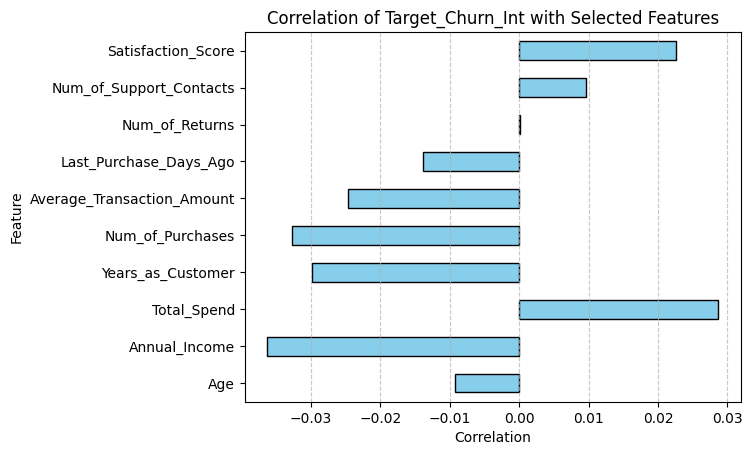


Feature loadings (correlations with principal components):
                                 PC1       PC2
Age                         0.162198 -0.007895
Annual_Income               0.199469 -0.380882
Total_Spend                -0.499737 -0.308156
Years_as_Customer          -0.266526 -0.263828
Num_of_Purchases           -0.215504 -0.348365
Average_Transaction_Amount  0.494997  0.095074
Last_Purchase_Days_Ago      0.350142  0.064932
Num_of_Returns              0.210210 -0.584927
Num_of_Support_Contacts     0.323019 -0.450026
Satisfaction_Score          0.224808 -0.105002


In [5]:
df['Target_Churn_Int'] = df['Target_Churn'].astype(int)
selected_fields = ["Age", "Annual_Income", "Total_Spend", "Years_as_Customer", 
                "Num_of_Purchases", "Average_Transaction_Amount", "Last_Purchase_Days_Ago",
                "Num_of_Returns", "Num_of_Support_Contacts", "Satisfaction_Score"]

correlation_results = df[selected_fields].corrwith(df["Target_Churn_Int"])
print(correlation_results)

correlation_results.plot(kind="barh", color="skyblue", edgecolor="black")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.title("Correlation of Target_Churn_Int with Selected Features")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


# PCA application in correlation investigation:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[selected_fields]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 2 principal components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Get principal component loadings (correlations)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=selected_fields
)
print("\nFeature loadings (correlations with principal components):")
print(loadings)

**Clusterization**

Using k-means

c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


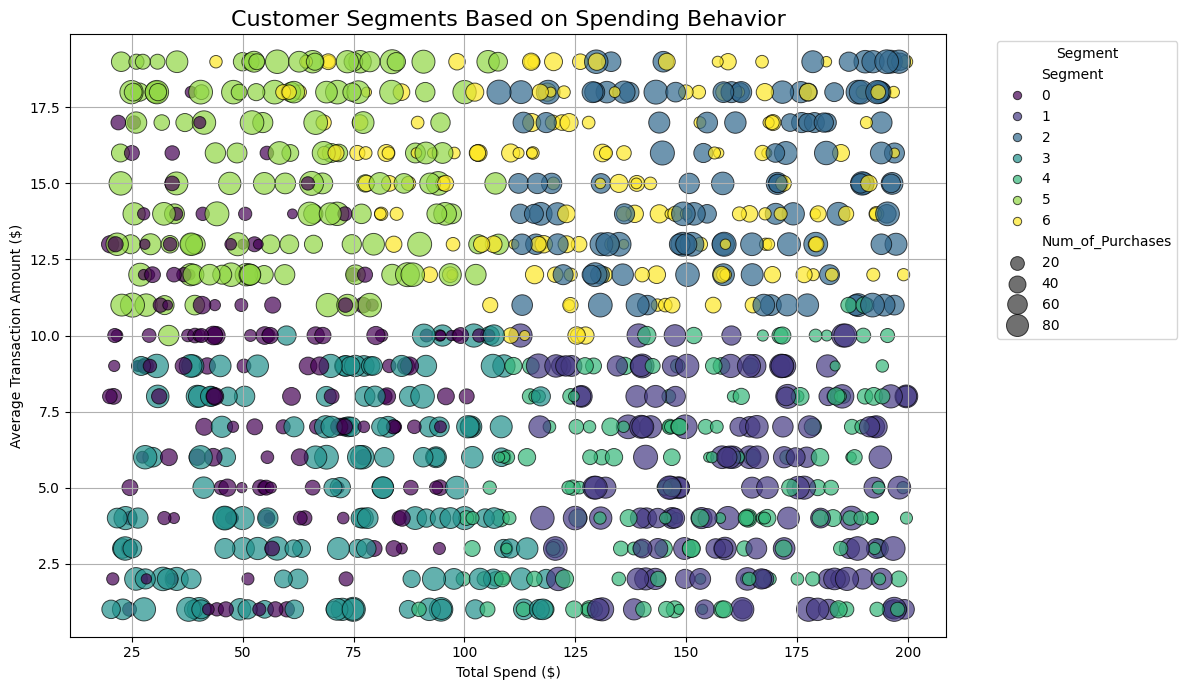

c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


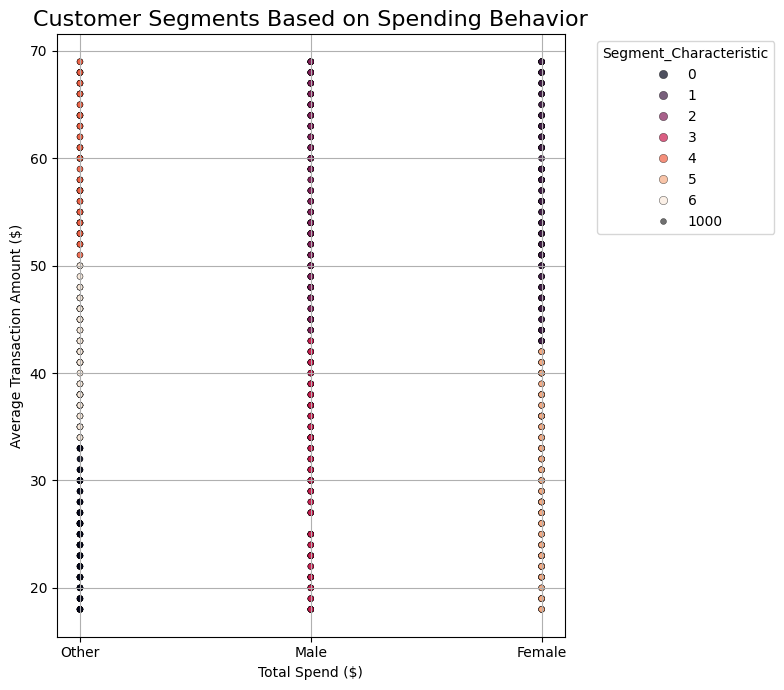

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df['Gender_Code'] = pd.Categorical(df['Gender']).codes

behavioral_features = ['Total_Spend', 'Average_Transaction_Amount', 'Num_of_Purchases']
clusterization_features = ['Annual_Income', 'Years_as_Customer', 'Num_of_Purchases']
characteristic_features = ['Gender_Code', 'Age']


scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[clusterization_features])

kmeans = KMeans(n_clusters=7, random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_features)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x='Annual_Income',
    y='Years_as_Customer',
    size='Num_of_Purchases',
    sizes=(50, 300),
    hue='Segment',
    palette='viridis',
    alpha=0.7,
    edgecolor='black'
)

# Enhancing the plot aesthetics
plt.title('Customer Segments Based on Spending Behavior', fontsize=16)
plt.xlabel('Total Spend ($)')
plt.ylabel('Average Transaction Amount ($)')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Cluster Age + Gender
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[characteristic_features])

kmeans = KMeans(n_clusters=7, random_state=42)
df['Segment_Characteristic'] = kmeans.fit_predict(scaled_features)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 7))
sns.scatterplot(
    data=df,
    x='Gender',
    y='Age',
    size=1000,
    hue='Segment_Characteristic',
    palette='rocket',
    alpha=0.7,
    edgecolor='black'
)

# Enhancing the plot aesthetics
plt.title('Customer Segments Based on Spending Behavior', fontsize=16)
plt.xlabel('Total Spend ($)')
plt.ylabel('Average Transaction Amount ($)')
plt.legend(title='Segment_Characteristic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**Cumulative theory-based Customer Utility Functions**

Formulas:
$$U(x) = \begin{cases} (x - r)^{\alpha}, & x \geq r \newline -\lambda (r - x)^{\beta}, & x < r \end{cases}$$

$$U(Customer) = w^+(P_{\text{stay}})\times V(\text{Gain}) - w^-(P_{\text{churn}})\times V(\text{Loss})$$

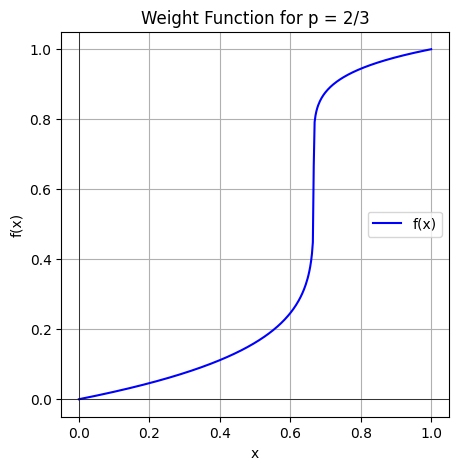

In [7]:
def real_root(x):
    return np.sign(x) * np.abs(x) ** (1/5)

def scale(a, b, c, d, t):
    return c + ((t - a) / (b - a)) * (d - c)

def weight_p(x, p):
    scaled_high = real_root( scale(p, 1, 0, 1, x) )
    result_high = scale(0, 1, p, 1, scaled_high)

    scaled_low = real_root( scale(0, p, -1, 0, x) )
    result_low = scale(-1, 0, 0, p, scaled_low)

    return np.where(x >= p, result_high, result_low)

x = np.linspace(0, 1, 400)  # 400 points for smooth plotting
y = weight_p(x, 2/3)  # Compute y values

plt.figure(figsize=(5, 5))
plt.plot(x, y, label="f(x)", color="blue")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Weight Function for p = 2/3")
plt.axhline(0, color="black", linewidth=0.5)  # X-axis
plt.axvline(0, color="black", linewidth=0.5)  # Y-axis
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Parameters based on typical Prospect Theory values (can be calibrated later)
alpha = 0.5      # sensitivity parameter for gains
beta = 0.5       # sensitivity parameter for losses
lambda_ = 2.0    # loss aversion coefficient (typical range: 2.0 - 2.5)
gamma = 0.61      # parameter for probability weighting function

# Probability weighting function based on CPT
def weighting_function(p, gamma):
    return np.exp(-(-np.log(p))**gamma)

# Calculate normalized satisfaction score (reference point)
# df['Normalized_Satisfaction'] = df['Satisfaction_Score'] / df['Satisfaction_Score'].max()
df['Normalized_Satisfaction'] = (( df['Satisfaction_Score'] / df['Satisfaction_Score'].max() 
                                 + df['Total_Spend'] / df['Total_Spend'].max() ) / 2 ).clip(lower=0)

# Estimate probability of churn from data
# churn_prob = df['Target_Churn'].mean()
# stay_prob = 1 - churn_prob

churn_total = df['Target_Churn'].mean()
stay_total = 1 - churn_total
print(f'Churn total: {churn_total}, Stay total: {stay_total}')

# Churn for each Segment
mean_churn_dict = df.groupby('Segment_Characteristic')['Target_Churn'].mean().to_dict()

def calculate_w_P_stay(segment):
    churn_value = mean_churn_dict.get(segment, 0)  # Get the segment churn value
    stay_prob = 1 - churn_value
    return weight_p(stay_prob, stay_total)  # Example calculation: probability of staying

def calculate_w_P_churn(segment):
    churn_value = mean_churn_dict.get(segment, 0)  # Get the segment churn value
    return weight_p(churn_value, churn_total)  # Example calculation: probability of staying


# Apply probability weighting
df['w_P_stay'] = df['Segment_Characteristic'].map(calculate_w_P_stay)
df['w_P_churn'] = df['Segment_Characteristic'].map(calculate_w_P_churn)



# Compute value functions for Gain and Loss based on Satisfaction_Score
df['V_Gain'] = (df['Normalized_Satisfaction'] ** alpha)
df['V_Loss'] = lambda_ * ((1 - df['Normalized_Satisfaction']) ** beta)


# Calculate Customer Utility based on CPT formula
df['Customer_Utility'] = (df['w_P_stay'] * df['V_Gain']) - (df['w_P_churn'] * df['V_Loss'])

# Display the results clearly (first 10 customers)
display_columns = [ 'Customer_ID', 'Satisfaction_Score', 'Normalized_Satisfaction',
                   'Annual_Income', 'V_Gain', 'V_Loss', 'w_P_stay', 'w_P_churn',
                   'Segment', 'Customer_Utility', 'Target_Churn']

# Displaying the calculated utilities
print("Customer Utility Function based on CPT (first 20 rows):")
display(df[display_columns].head(20))



from sklearn.metrics import confusion_matrix

df['Customer_Utility_binary'] = df['Customer_Utility'] > 0  
df['Customer_Utility_binary'] = df['Customer_Utility_binary'].astype(int)  # Convert to 0/1
# df['b_numeric'] = df['b'].astype(int)

cm = confusion_matrix(df['Target_Churn_Int'], df['Customer_Utility_binary'])
print("Confusion Matrix:\n", cm)
print((df['Customer_Utility'] < 0).sum())
print(((df['Customer_Utility'] < 0) & (df['Target_Churn_Int'] == 1)).sum())
print(((df['Customer_Utility'] < 0) & (df['Target_Churn'] == True)).sum())

Churn total: 0.526, Stay total: 0.474
Customer Utility Function based on CPT (first 20 rows):


,Customer_ID,Satisfaction_Score,Normalized_Satisfaction,Annual_Income,V_Gain,V_Loss,w_P_stay,w_P_churn,Segment,Customer_Utility,Target_Churn
0,1,3,0.594640,45.15,0.771129,1.273358,0.212985,0.787015,0,-0.837913,True
1,2,3,0.751290,79.51,0.866770,0.997417,0.672462,0.327538,5,0.256177,False
2,3,2,0.230943,29.19,0.480565,1.753918,0.786862,0.213138,5,0.004311,True
3,4,5,0.955531,79.63,0.977513,0.421752,0.217895,0.782105,0,-0.116859,True
4,5,5,0.769554,77.66,0.877242,0.960096,0.217895,0.782105,5,-0.559749,False
5,6,4,0.412760,190.43,0.642464,1.532632,0.672462,0.327538,2,-0.069963,False
6,7,1,0.275634,172.13,0.525008,1.702194,0.786862,0.213138,1,0.050306,False
7,8,3,0.663558,88.90,0.814591,1.160072,0.211995,0.788005,3,-0.741453,False
8,9,4,0.646783,24.46,0.804228,1.188641,0.211995,0.788005,0,-0.766162,True
9,10,2,0.690196,169.59,0.830780,1.113201,0.212985,0.787015,6,-0.699161,False


Confusion Matrix:
 [[271 203]
 [313 213]]
584
313
313
